**This notebook has implementation of ELENA for solving the travelling salesman problem on random city coordinates set.**





---


**Structure:**

1. Imports
2. Parameter Initialization
3. Implementation
4. Visualizations


---



Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random

from typing import List, Tuple
from multiprocessing import Pool, cpu_count
from functools import lru_cache
from scipy.spatial.distance import pdist, squareform

Initial Set-Up

In [2]:
# Initialze experiments
city_counts = [10, 25, 50, 100, 200]

# Initialize parameters
POP_SIZE = 50
GENERATIONS = 50
MUTATION = 0.5
CROSSOVER = 0.7
STABILITY_THRESHOLD = 0.7

# Generate a small dataset of city coordinates
np.random.seed(42)

# Function to calculate total distance of a route
@lru_cache(maxsize=None)
def calculate_distance(route):
    return sum(dist_matrix[route[i], route[i+1]] for i in range(len(route)-1)) + dist_matrix[route[-1], route[0]]

ELENA implementation


Running Evolutionary Algorithm for 10 cities...
Generation 0: Best Fitness = 0.3445, Avg Fitness = 0.2463
Generation 1: Best Fitness = 0.3445, Avg Fitness = 0.3068
Generation 2: Best Fitness = 0.3445, Avg Fitness = 0.3336
Generation 3: Best Fitness = 0.3445, Avg Fitness = 0.3385
Generation 4: Best Fitness = 0.3445, Avg Fitness = 0.3350
Generation 5: Best Fitness = 0.3445, Avg Fitness = 0.2552
Early stopping at generation 5


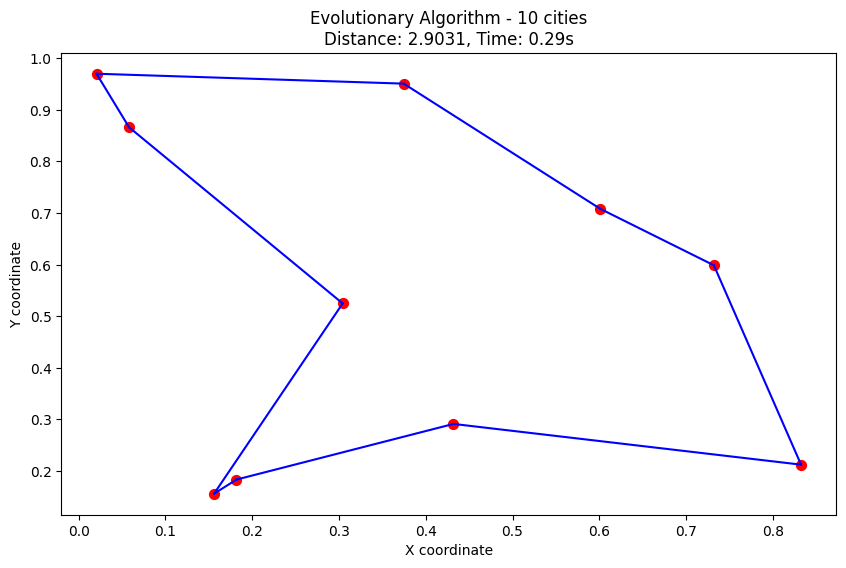


Running Evolutionary Algorithm for 25 cities...
Generation 0: Best Fitness = 0.2442, Avg Fitness = 0.2007
Generation 1: Best Fitness = 0.2455, Avg Fitness = 0.2285
Generation 2: Best Fitness = 0.2455, Avg Fitness = 0.2398
Generation 3: Best Fitness = 0.2455, Avg Fitness = 0.2411
Generation 4: Best Fitness = 0.2455, Avg Fitness = 0.2424
Generation 5: Best Fitness = 0.2455, Avg Fitness = 0.2091
Generation 6: Best Fitness = 0.2455, Avg Fitness = 0.2339
Early stopping at generation 6


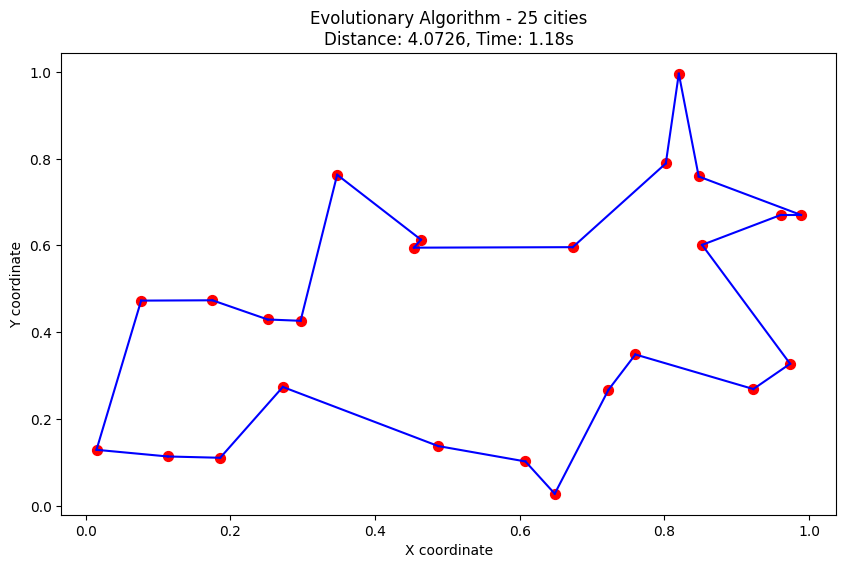


Running Evolutionary Algorithm for 50 cities...
Generation 0: Best Fitness = 0.1465, Avg Fitness = 0.1312
Generation 1: Best Fitness = 0.1694, Avg Fitness = 0.1536
Generation 2: Best Fitness = 0.1696, Avg Fitness = 0.1631
Generation 3: Best Fitness = 0.1716, Avg Fitness = 0.1662
Generation 4: Best Fitness = 0.1719, Avg Fitness = 0.1669
Generation 5: Best Fitness = 0.1698, Avg Fitness = 0.1467
Generation 6: Best Fitness = 0.1719, Avg Fitness = 0.1639
Generation 7: Best Fitness = 0.1719, Avg Fitness = 0.1679
Generation 8: Best Fitness = 0.1719, Avg Fitness = 0.1677
Generation 9: Best Fitness = 0.1720, Avg Fitness = 0.1689
Generation 10: Best Fitness = 0.1696, Avg Fitness = 0.1466
Generation 11: Best Fitness = 0.1720, Avg Fitness = 0.1635
Generation 12: Best Fitness = 0.1720, Avg Fitness = 0.1689
Generation 13: Best Fitness = 0.1720, Avg Fitness = 0.1693
Generation 14: Best Fitness = 0.1720, Avg Fitness = 0.1688
Early stopping at generation 14


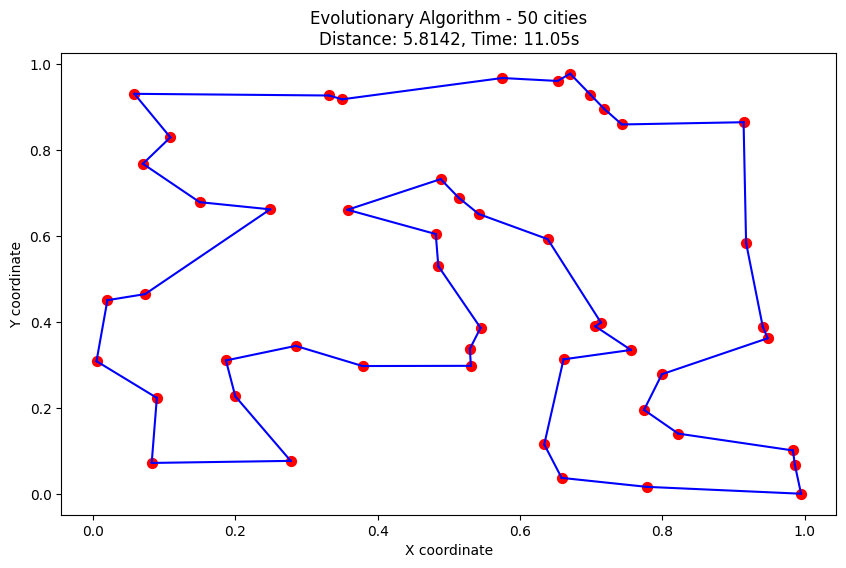


Running Evolutionary Algorithm for 100 cities...
Generation 0: Best Fitness = 0.1102, Avg Fitness = 0.1012
Generation 1: Best Fitness = 0.1160, Avg Fitness = 0.1101
Generation 2: Best Fitness = 0.1184, Avg Fitness = 0.1130
Generation 3: Best Fitness = 0.1201, Avg Fitness = 0.1149
Generation 4: Best Fitness = 0.1198, Avg Fitness = 0.1166
Generation 5: Best Fitness = 0.1203, Avg Fitness = 0.1058
Generation 6: Best Fitness = 0.1203, Avg Fitness = 0.1151
Generation 7: Best Fitness = 0.1216, Avg Fitness = 0.1182
Generation 8: Best Fitness = 0.1226, Avg Fitness = 0.1186
Generation 9: Best Fitness = 0.1226, Avg Fitness = 0.1191
Generation 10: Best Fitness = 0.1226, Avg Fitness = 0.1062
Generation 11: Best Fitness = 0.1226, Avg Fitness = 0.1175
Generation 12: Best Fitness = 0.1226, Avg Fitness = 0.1193
Generation 13: Best Fitness = 0.1226, Avg Fitness = 0.1197
Early stopping at generation 13


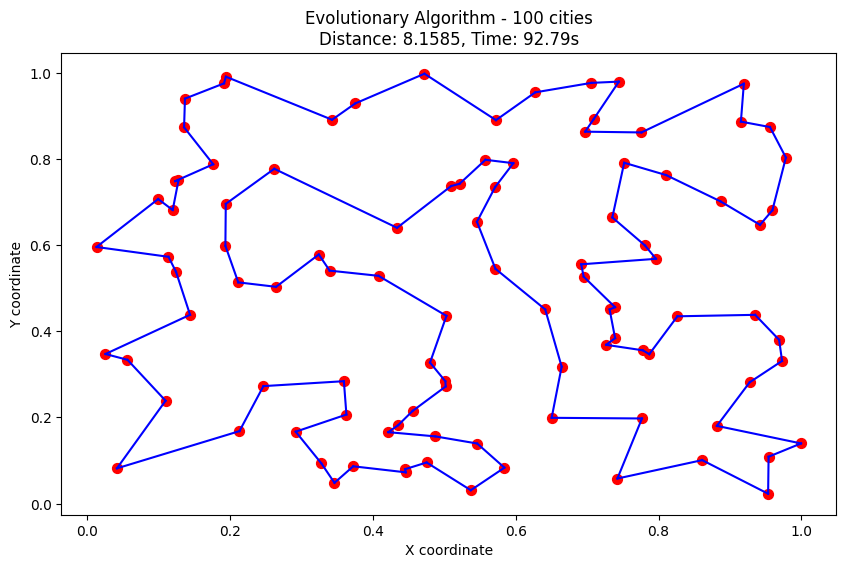


Running Evolutionary Algorithm for 200 cities...
Generation 0: Best Fitness = 0.0818, Avg Fitness = 0.0739
Generation 1: Best Fitness = 0.0881, Avg Fitness = 0.0819
Generation 2: Best Fitness = 0.0881, Avg Fitness = 0.0851
Generation 3: Best Fitness = 0.0889, Avg Fitness = 0.0862
Generation 4: Best Fitness = 0.0896, Avg Fitness = 0.0872


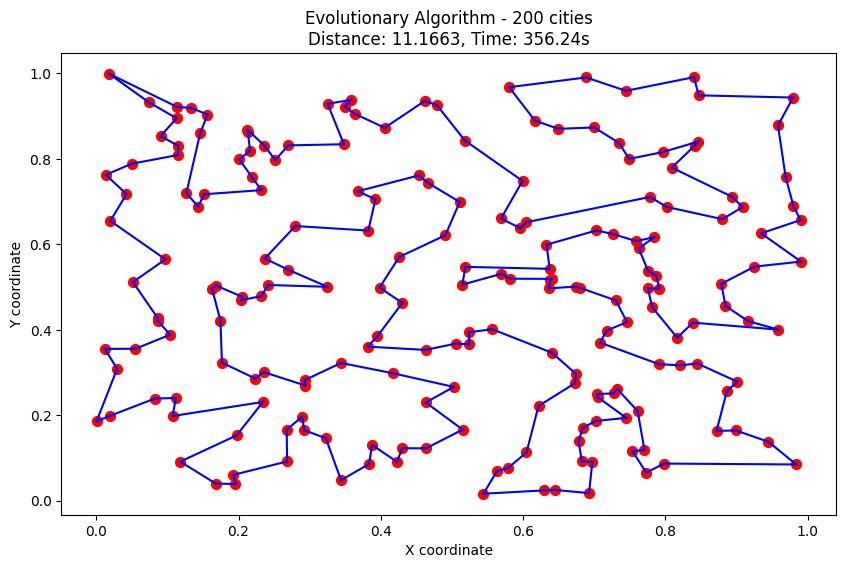


Final Summary:
Evolutionary 10 cities: Distance = 2.9031, Time = 0.29 seconds
Evolutionary 25 cities: Distance = 4.0726, Time = 1.18 seconds
Evolutionary 50 cities: Distance = 5.8142, Time = 11.05 seconds
Evolutionary 100 cities: Distance = 8.1585, Time = 92.79 seconds
Evolutionary 200 cities: Distance = 11.1663, Time = 356.24 seconds


In [3]:
class CompressedLP:
    def __init__(self, city_index):
        self.city_index = city_index
        self.epigenetic_tags = {
            'mutation_resistance': np.random.random(),  # Controls mutation probability
            'crossover_affinity': np.random.random(),   # Influences crossover segment selection
            'stability_score': np.random.random()
        }

class CompressedLPTSP:
    def __init__(self, num_cities, subpop_id=0):
        self.neurons = [CompressedLP(i) for i in range(num_cities)]
        self.subpop_id = subpop_id
        self.fitness_history = []
        np.random.shuffle(self.neurons)
        self.needs_improvement = True  # Flag for 2-opt improvement

    def get_route(self):
        return [n.city_index for n in self.neurons]

    def update_epigenetic_tags(self, improvement):
        for neuron in self.neurons:
            if improvement > 0:
                neuron.epigenetic_tags['stability_score'] = min(
                    1.0, neuron.epigenetic_tags['stability_score'] + 0.1)
                # Increase mutation resistance when improvement is found
                neuron.epigenetic_tags['mutation_resistance'] = min(
                    1.0, neuron.epigenetic_tags['mutation_resistance'] + 0.05)
            else:
                neuron.epigenetic_tags['stability_score'] = max(
                    0.0, neuron.epigenetic_tags['stability_score'] - 0.1)
                # Decrease mutation resistance when no improvement
                neuron.epigenetic_tags['mutation_resistance'] = max(
                    0.0, neuron.epigenetic_tags['mutation_resistance'] - 0.05)

    def two_opt(self, route):
          improved = True
          best_distance = calculate_distance(tuple(route))
          initial_distance = best_distance

          while improved:
              improved = False
              for i in range(1, len(route) - 1):
                  for j in range(i + 1, len(route)):
                      new_route = route[:i] + route[i:j][::-1] + route[j:]
                      new_distance = calculate_distance(tuple(new_route))
                      if new_distance < best_distance:
                          route = new_route
                          best_distance = new_distance
                          improved = True
                          self.neurons = [CompressedLP(city) for city in route]

          improvement = initial_distance - best_distance
          self.update_epigenetic_tags(improvement)
          self.needs_improvement = False  # Reset improvement flag
          return route, best_distance

    def fitness(self):
        route = self.get_route()
        distance = calculate_distance(tuple(route))
        return 1 / distance, route

    def mutate(self):
        self.needs_improvement = True  # Set flag for needed improvement
        mutation_type = np.random.choice(['swap', 'insert', 'reverse'])

        # Use mutation_resistance to determine eligible neurons
        eligible_indices = [i for i, n in enumerate(self.neurons)
                          if n.epigenetic_tags['mutation_resistance'] < np.random.random()]

        if len(eligible_indices) < 2:
            return

        if mutation_type == 'swap':
            i, j = np.random.choice(eligible_indices, 2, replace=False)
            self.neurons[i], self.neurons[j] = self.neurons[j], self.neurons[i]

        elif mutation_type == 'insert':
            i, j = np.random.choice(eligible_indices, 2, replace=False)
            city = self.neurons.pop(i)
            self.neurons.insert(j, city)

        else:  # reverse
            i, j = sorted(np.random.choice(eligible_indices, 2, replace=False))
            self.neurons[i:j+1] = reversed(self.neurons[i:j+1])

def crossover(parent1, parent2):
    child = CompressedLPTSP(len(parent1.neurons))

    # Use crossover_affinity to influence segment selection
    crossover_points = [i for i, n in enumerate(parent1.neurons)
                       if n.epigenetic_tags['crossover_affinity'] > 0.5]

    if len(crossover_points) >= 2:
        start, end = sorted(np.random.choice(crossover_points, 2, replace=False))
    else:
        start, end = sorted(np.random.choice(len(parent1.neurons), 2, replace=False))

    segment = parent1.neurons[start:end]
    child_cities = set(n.city_index for n in segment)

    remaining = [n for n in parent2.neurons if n.city_index not in child_cities]

    child.neurons = (remaining[:start] + segment + remaining[start:])
    child.needs_improvement = True  # Set flag for needed improvement
    return child

def horizontal_gene_transfer(subpopulations):
    for i, subpop1 in enumerate(subpopulations):
        for j, subpop2 in enumerate(subpopulations):
            if i != j:
                for ind1 in subpop1:
                    for ind2 in subpop2:
                        if np.random.random() < 0.1:
                            stable_segment = find_stable_segment(ind1)
                            if stable_segment:
                                transfer_segment(ind2, stable_segment)

def find_stable_segment(individual):
    stability_threshold = STABILITY_THRESHOLD
    stable_positions = [i for i, n in enumerate(individual.neurons)
                       if n.epigenetic_tags['stability_score'] > stability_threshold]

    if len(stable_positions) < 2:
        return None

    start = stable_positions[0]
    length = 1
    for i in range(1, len(stable_positions)):
        if stable_positions[i] == stable_positions[i-1] + 1:
            length += 1
        else:
            break

    if length >= 2:
        return individual.neurons[start:start+length]
    return None

def transfer_segment(recipient, segment):
    segment_cities = set(n.city_index for n in segment)
    recipient.neurons = [n for n in recipient.neurons if n.city_index not in segment_cities]
    insert_pos = np.random.randint(0, len(recipient.neurons))
    recipient.neurons[insert_pos:insert_pos] = segment

def process_individual(network):
    if np.random.random() < MUTATION:
        network.mutate()

    # Only apply 2-opt if improvement is needed
    if network.needs_improvement:
        route = network.get_route()
        route, _ = network.two_opt(route)
        network.neurons = [CompressedLP(city) for city in route]

    return network.fitness()[0], network

def evolve_population(pop_size, generations, early_stopping_generations, num_subpops=3):
    subpopulations = [
        [CompressedLPTSP(num_cities, subpop_id=i) for _ in range(pop_size // num_subpops)]
        for i in range(num_subpops)
    ]

    best_fitness = 0
    best_fitness_count = 0

    with Pool(processes=cpu_count()) as pool:
        for gen in range(generations):
            for subpop in subpopulations:
                fitnesses_and_networks = pool.map(process_individual, subpop)
                sorted_population = sorted(fitnesses_and_networks, key=lambda x: x[0], reverse=True)
                subpop[:] = [network for _, network in sorted_population]

            if gen % 5 == 0:
                horizontal_gene_transfer(subpopulations)

            current_best_fitness = max(
                subpop[0].fitness()[0] for subpop in subpopulations
            )
            avg_fitness = np.mean([ind.fitness()[0] for subpop in subpopulations for ind in subpop])

            print(f"Generation {gen}: Best Fitness = {current_best_fitness:.4f}, Avg Fitness = {avg_fitness:.4f}")

            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_fitness_count = 0
            else:
                best_fitness_count += 1

            if best_fitness_count >= early_stopping_generations:
                print(f"Early stopping at generation {gen}")
                break

            for subpop in subpopulations:
                elite_size = len(subpop) // 10
                new_population = list(subpop[:elite_size])

                while len(new_population) < len(subpop):
                    if np.random.random() < CROSSOVER:
                        tournament_size = 5
                        parent1 = max(np.random.choice(subpop, tournament_size),
                                    key=lambda x: x.fitness()[0])
                        parent2 = max(np.random.choice(subpop, tournament_size),
                                    key=lambda x: x.fitness()[0])
                        child = crossover(parent1, parent2)
                    else:
                        child = np.random.choice(subpop[:len(subpop)//2])

                    new_population.append(child)

                subpop[:] = new_population

    return max(
        (max(subpop, key=lambda x: x.fitness()[0]) for subpop in subpopulations),
        key=lambda x: x.fitness()[0]
    )

def run_evolutionary_algorithm(num_cities, pop_size=POP_SIZE, generations=GENERATIONS,
                             early_stopping_generations=5):
    global cities, dist_matrix

    cities = np.random.rand(num_cities, 2)
    dist_matrix = squareform(pdist(cities))

    print(f"\nRunning Evolutionary Algorithm for {num_cities} cities...")
    start_time = time.time()

    best_solution = evolve_population(pop_size, generations,
                                    early_stopping_generations)
    fitness, route = best_solution.fitness()
    distance = 1 / fitness

    end_time = time.time()
    execution_time = end_time - start_time

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.scatter(cities[:, 0], cities[:, 1], c='red', s=50)

    for j in range(len(route)):
        start = cities[route[j]]
        end = cities[route[(j+1) % len(route)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')

    plt.title(f"Evolutionary Algorithm - {num_cities} cities\n" +
             f"Distance: {distance:.4f}, Time: {execution_time:.2f}s")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.show()

    return {
        "distance": distance,
        "time": execution_time,
        "route": route
    }

# Run each case independently
results = {}

for num_cities in city_counts:
    generations = 5 if num_cities == 200 else GENERATIONS
    result = run_evolutionary_algorithm(
        num_cities=num_cities,
        pop_size=POP_SIZE,
        generations=generations,
        early_stopping_generations=5
    )
    results[f"Evolutionary {num_cities} cities"] = result

# Print summary
print("\nFinal Summary:")
for name, result in results.items():
    print(f"{name}: Distance = {result['distance']:.4f}, " +
          f"Time = {result['time']:.2f} seconds")